In [1]:
%matplotlib inline

In [2]:
from cosmodc2.sdss_colors import load_umachine_processed_sdss_catalog
sdss = load_umachine_processed_sdss_catalog()
print(sdss.keys())

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['ra', 'dec', 'z', 'sm', 'ssfr', 'nd', 'restframe_extincted_sdss_abs_magr', 'restframe_extincted_sdss_gr', 'restframe_extincted_sdss_ri', 'size_kpc', 'dr7_PhotoObj_Table_ID', 'sfr_percentile_fixed_sm', 'gr_percentile_fixed_magr']


In [3]:
import os
from astropy.table import Table

#  MDPL2-based mock
dirname = "/Users/aphearin/work/random/0331"
basename = "cutmock_1e9.hdf5"
fname = os.path.join(dirname, basename)
mock = Table.read(fname, path='data')
mock.Lbox = 500.

#  Bpl-based mock
# dirname = "/Users/aphearin/work/random/0331"
# basename = "testing_bpl_based_v4.hdf5"
# fname = os.path.join(dirname, basename)
# mock = Table.read(fname, path='data')
# mock.Lbox = 250.

print(mock.keys())

['halo_id', 'upid', 'vpeak', 'mpeak', 'mvir', 'vmax', 'sm', 'sfr', 'obs_sm', 'obs_sfr', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'hostid', 'host_halo_x', 'host_halo_y', 'host_halo_z', 'host_halo_vx', 'host_halo_vy', 'host_halo_vz', 'host_halo_mvir', 'host_centric_x', 'host_centric_y', 'host_centric_z', 'host_centric_vx', 'host_centric_vy', 'host_centric_vz', 'obs_sfr_percentile', 'sfr_percentile']


## Map $M_{\rm r}$ onto every galaxy based on its $M_{\ast}$ 

In [4]:
from cosmodc2.sdss_colors import mock_magr

mock['restframe_extincted_sdss_abs_magr'] = mock_magr(
            mock['upid'], mock['obs_sm'], mock['sfr_percentile'], 
            mock['host_halo_mvir'], sdss['sm'], sdss['sfr_percentile_fixed_sm'], 
            sdss['restframe_extincted_sdss_abs_magr'], sdss['z'])


## Map ${\rm g-r}$ and ${\rm r-i}$ onto every galaxy 

In [6]:
from cosmodc2.sdss_colors import gr_ri_monte_carlo

magr = mock['restframe_extincted_sdss_abs_magr'] 
percentile = mock['sfr_percentile']
redshift = np.zeros_like(magr)

gr, ri, is_red_ri, is_red_gr = gr_ri_monte_carlo(
    magr, percentile, redshift, local_random_scale=0.1)

mock['gr'] = gr
mock['ri'] = ri
mock['is_red_ri'] = is_red_ri
mock['is_red_gr'] = is_red_gr

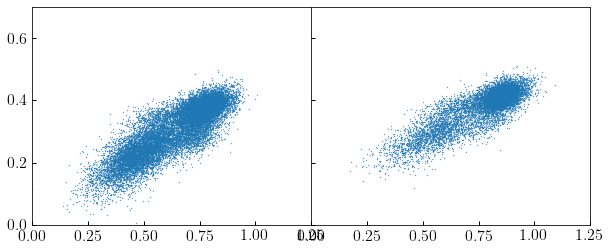

In [7]:
faint, bright = -19, -19.25
magr_mask1 = (mock['restframe_extincted_sdss_abs_magr'] < faint)
magr_mask1 *= (mock['restframe_extincted_sdss_abs_magr'] > bright)

faint, bright = -21, -21.25
magr_mask2 = (mock['restframe_extincted_sdss_abs_magr'] < faint)
magr_mask2 *= (mock['restframe_extincted_sdss_abs_magr'] > bright)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
# fig.subplots_adjust(hspace=0)  #  smash top and bottom plots
fig.subplots_adjust(wspace=0)  #  smash left and right plots

nskip = 20
# __=ax1.scatter(mock['gr'][magr_mask1][::nskip], mock['ri'][magr_mask1][::nskip], s=0.1)
# __=ax2.scatter(mock['gr'][magr_mask2][::nskip], mock['ri'][magr_mask2][::nskip], s=0.1)

__=ax1.scatter(mock['gr'][magr_mask1][::nskip], mock['ri'][magr_mask1][::nskip], s=0.1)
__=ax2.scatter(mock['gr'][magr_mask2][::nskip], mock['ri'][magr_mask2][::nskip], s=0.1)

xlim1 = ax1.set_xlim(0, 1.25)
ylim1 = ax1.set_ylim(0, 0.7)
xlim2 = ax2.set_xlim(0, 1.25)
ylim2 = ax2.set_ylim(0, 0.7)



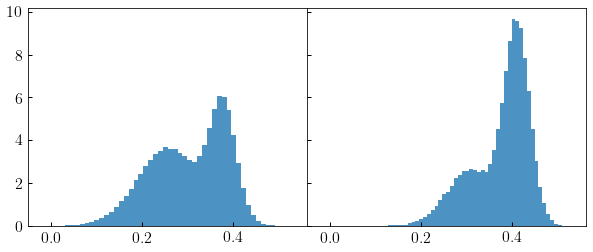

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
# fig.subplots_adjust(hspace=0)  #  smash top and bottom plots
fig.subplots_adjust(wspace=0)  #  smash left and right plots

# nskip = 20
# __=ax1.scatter(mock['gr2'][magr_mask1][::nskip], mock['ri2'][magr_mask1][::nskip], s=0.1)
# __=ax2.scatter(mock['gr2'][magr_mask2][::nskip], mock['ri2'][magr_mask2][::nskip], s=0.1)

__=ax1.hist(mock['ri'][magr_mask1], bins=50, normed=True, alpha=0.8)
__=ax2.hist(mock['ri'][magr_mask2], bins=50, normed=True, alpha=0.8)

# xlim1 = ax1.set_xlim(0, 1.25)
# ylim1 = ax1.set_ylim(0, 0.7)
# xlim2 = ax2.set_xlim(0, 1.25)
# ylim2 = ax2.set_ylim(0, 0.7)


In [10]:
from cosmodc2.sdss_colors import remap_cluster_bcg_gr_ri_color

gr_remapped, ri_remapped = remap_cluster_bcg_gr_ri_color(mock['upid'], mock['host_halo_mvir'], 
                              np.copy(mock['gr']), np.copy(mock['ri']))

mock['_gr_no_remap'] = np.copy(mock['gr'])
mock['_ri_no_remap'] = np.copy(mock['ri'])
mock['gr'] = gr_remapped
mock['ri'] = ri_remapped